In [1]:
from causality_simulation import *
import plotly.express as px
import pandas as pd
%matplotlib inline

The truffula tree bears fruit every year during summer. Hans, a botanist, wants to know whether the number of fruits that a truffula tree bears affects the neighbouring bee population. Out of 500 trees in his truffula orchard, he carefully records the average daily number of bees that land on each tree, as well as the total number of fruits during the fruit-bearing season.

In [2]:
#[Scatter plot of # bees vs # fruits, showing positive correlation]
config_observation = {
    'name': 'Observation',
    'N': 500,
    'intervene': {
    }
}
fruit_experiment_observation = Experiment(fruit_node)
fruit_experiment_observation.fixedSetting(config=[config_observation])

In [3]:
data = fruit_experiment_observation.data
df = pd.DataFrame(data['Observation'])
fig = px.scatter(df, x="x", y="y", color='Number of Bees', title='Orchard Layout', hover_data=data['Observation'].keys())
fig.update_layout({'height':650, 'width':650})
fig.show()

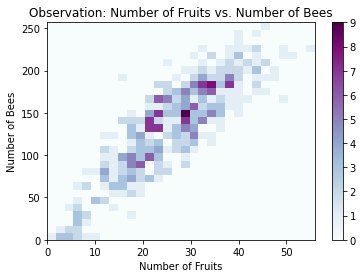

Correlation (r):  0.860
P-value:  8.23e-148


In [4]:
fruit_experiment_observation.plotSetting()

Is there a correlation between the number of bees and the number of fruits? If so, is the correlation positive or negative? How strong is the correlation (p-value)? What can we conclude about the causal relationship between the number of bees and the number of fruits from this result?

[Answer: Only correlation. Don’t know about causation.]

Hans then decides to perform an experiment. Over the course of the following summer, he randomly selects 250 out of the 500 truffula trees, and diligently plucks out all the fruits that are starting to grow on these trees. The other 250 trees are left alone. He continues to record the average daily number of bees that land on each of the 500 trees.

What’s a control and why is it important? Random assignment and why important?

[Answer]

In [6]:
config_nofruits_control = {
    'name': 'Control',
    'N': 250,
    'intervene': {
    }
}
config_nofruits_intervene = {
    'name': 'Intervention (no fruits)',
    'N': 250,
    'intervene': {
        'Number of Fruits': ['fixed', 0]
    }
}
config = [config_nofruits_control, config_nofruits_intervene]
fruit_experiment_nofruits = Experiment(fruit_node)
fruit_experiment_nofruits.fixedSetting(config=config)

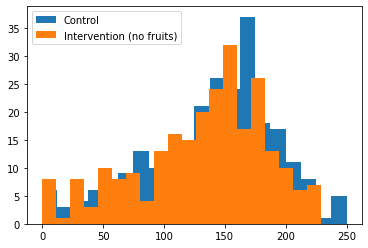

In [7]:
data = fruit_experiment_nofruits.data
plt.hist(data['Control']['Number of Bees'], bins=20, label='Control')
plt.hist(data['Intervention (no fruits)']['Number of Bees'], bins=20, label='Intervention (no fruits)')
plt.legend()
plt.show()

Is there a correlation between the number of bees and whether the tree has fruits? What can you conclude about the causal relationship between the number of bees and the number of fruits from this result?

[Answer: Fruits on the trees do not cause more bees.]

In [ ]:
#Make bees an on/off option (using nets)

Design an experiment to further investigate the causal relationship between the number of bees and the number of fruits that a truffula tree bears.

[Intervene on the number of bees that land on a tree and record the number of fruits during the fruit-bearing season. Scatter plot of number of fruits vs number of bees, showing strong positive correlation. Conclude that more bees cause more fruits.]

In [ ]:
#Design experiment

In [8]:
fruit_experiment = Experiment(fruit_node)
fruit_experiment.setting(disabled=['Soil Quality', 'Wind Speed', 'x', 'y', 'Fertilizer'])

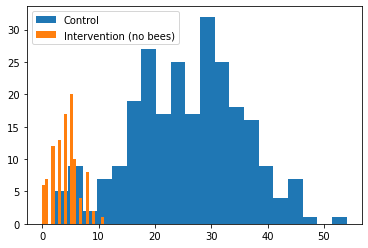

In [9]:
data = fruit_experiment.data
plt.hist(data['Control']['Number of Fruits'], bins=20, label='Control')
plt.hist(data['Intervention (no bees)']['Number of Fruits'], bins=20, label='Intervention (no bees)')
plt.legend()
plt.show()

TODO:
* p-value?
* Fix plot()
* Find out how to make interactive Plotly plot with checkboxes for showing/hiding different groups, dropdown menu for different pairs of variables, subplots
* Categorical variables (kombucha) needs to be list of text options, not 0/1
* Add node.text as a line in groupSettings()